In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers as opt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
import pandas as pd
import seaborn as sns
import shap

In [2]:
DATA_PATH="./Vowel_Data/Formant/"

In [3]:
seed=0

In [62]:
def get_formant(file_path):
    formant=pd.read_csv(file_path,
                delim_whitespace=True,
                header=None,
                names=["time","F1","F2","F3","F4","F5"],
                dtype=np.float64,
                na_values="--undefined--")
    return formant

def get_all_formants(path=DATA_PATH):
    labels=labels=sorted(os.listdir(path))
    all_formant=pd.DataFrame() #empty dataframe to store all_formants
    
    for label_index,label in enumerate(labels):
        folder_formant=pd.DataFrame() #empty dataframe to store formants of indivuals vowels/words i.e. folders

        formant_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(formant_files,"Reading Formants of label -'{}'".format(label)):
            #print(file)
            individual_formant=get_formant(file_path=file)
            
            #for i in range(2,len(individual_formant)):
             #   F_i=individual_formant.loc[i,'F1':'F5'].values
              #  F_i1=individual_formant.loc[i-1,'F1':'F5'].values
              #  F_i2=individual_formant.loc[i-2,'F1':'F5'].values
               # individual_formant.loc[i,['F1_diff2','F2_diff2','F3_diff2','F4_diff2','F5_diff2']]=F_i-2*F_i1+F_i2
            
            length=len(individual_formant)
            F_i=individual_formant.loc[2:,'F1':'F5'].values
            F_i1=individual_formant.loc[1:length-2,'F1':'F5'].values
            F_i2=individual_formant.loc[:length-3,'F1':'F5'].values
            assert len(F_i)==len(F_i1)==len(F_i2)
            individual_formant.loc[2:,['F1_diff2','F2_diff2','F3_diff2','F4_diff2','F5_diff2']]=F_i-2*F_i1+F_i2
            
            individual_formant=individual_formant.dropna()   #drop the first two rows as there are NaN values due to the difference
            
            folder_formant=folder_formant.append(individual_formant,ignore_index=True)
        
        folder_formant['disp(F5-F1)']=folder_formant['F5']-folder_formant['F1']
        folder_formant['disp(F4-F3)']=folder_formant['F4']-folder_formant['F3']
        folder_formant['disp(F5-F3)']=folder_formant['F5']-folder_formant['F3']
        folder_formant['disp(F5-F4)']=folder_formant['F5']-folder_formant['F4']
        
        folder_formant['label']=label_index  #new columns for encoding label
        
        all_formant=all_formant.append(folder_formant,ignore_index=True)
        
        
    return all_formant

def get_train_test(split_ratio=0.8,random_state=42):
    all_formants=get_all_formants()
    
    y=all_formants['label'].values
    
    #all_formants['disp(F5-F1)']=all_formants['F5']-all_formants['F1']
    #all_formants['disp(F4-F3)']=all_formants['F4']-all_formants['F3']
    #all_formants['disp(F5-F3)']=all_formants['F5']-all_formants['F3']
    #all_formants['disp(F5-F4)']=all_formants['F5']-all_formants['F4']
    
    only_formants=all_formants.drop(labels=['label'],axis=1)
    
    normalized_formants=(only_formants-only_formants.mean())/only_formants.std()
    
    X=normalized_formants.values
    

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [4]:
def get_formant(file_path):
    formant=pd.read_csv(file_path,
                delim_whitespace=True,
                header=None,
                names=["time","F1","F2","F3","F4","F5"],
                dtype=np.float64,
                na_values="--undefined--")
    return formant

In [5]:
path=DATA_PATH

In [30]:
    labels=labels=sorted(os.listdir(path))
    all_formant=pd.DataFrame() #empty dataframe to store all_formants
    
    for label_index,label in enumerate(labels):
        folder_formant=pd.DataFrame() #empty dataframe to store formants of indivuals vowels/words i.e. folders

        formant_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(formant_files,"Reading Formants of label -'{}'".format(label)):
            #print(file)
            individual_formant=get_formant(file_path=file)

Reading Formants of label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 470.76it/s]


In [7]:
individual_formant

,time,F1,F2,F3,F4,F5
0,0.025,452.09,948.12,2527.81,4086.58,4740.32
1,0.031,444.29,939.36,2557.82,4073.15,4700.37
2,0.038,426.03,929.72,2580.59,4060.06,4590.44
3,0.044,417.61,938.16,2584.27,4010.16,4569.61
4,0.050,414.34,953.77,2583.57,4015.34,4585.22
5,0.056,411.11,965.89,2593.48,4058.24,4652.08
6,0.062,410.56,972.72,2640.72,4045.01,4592.00
7,0.069,415.33,984.43,2678.19,4048.64,4485.93
8,0.075,420.64,985.92,2637.95,4054.00,4509.31
9,0.081,427.85,975.94,2632.97,4055.06,4516.11


In [10]:
individual_formant.loc[2,'F5']

4590.44

In [11]:
F_i=individual_formant.loc[2,'F5']
F_i1=individual_formant.loc[2-1,'F5']
F_i2=individual_formant.loc[2-2,'F5']

In [21]:
individual_formant.loc[2,'F5_diff2']=F_i-2*F_i1+F_i2

In [22]:
individual_formant

,time,F1,F2,F3,F4,F5,F5_diff2
0,0.025,452.09,948.12,2527.81,4086.58,4740.32,NaN
1,0.031,444.29,939.36,2557.82,4073.15,4700.37,NaN
2,0.038,426.03,929.72,2580.59,4060.06,4590.44,-69.98
3,0.044,417.61,938.16,2584.27,4010.16,4569.61,NaN
4,0.050,414.34,953.77,2583.57,4015.34,4585.22,NaN
5,0.056,411.11,965.89,2593.48,4058.24,4652.08,NaN
6,0.062,410.56,972.72,2640.72,4045.01,4592.00,NaN
7,0.069,415.33,984.43,2678.19,4048.64,4485.93,NaN
8,0.075,420.64,985.92,2637.95,4054.00,4509.31,NaN
9,0.081,427.85,975.94,2632.97,4055.06,4516.11,NaN


In [31]:
for i in range(2,len(individual_formant)):
    F_i=individual_formant.loc[i,'F5']
    F_i1=individual_formant.loc[i-1,'F5']
    F_i2=individual_formant.loc[i-2,'F5']
    individual_formant.loc[i,'F5_diff2']=F_i-2*F_i1+F_i2
    
individual_formant.fillna(individual_formant.loc[2,'F5_diff2'])

,time,F1,F2,F3,F4,F5,F5_diff2
0,0.025,452.09,948.12,2527.81,4086.58,4740.32,-69.98
1,0.031,444.29,939.36,2557.82,4073.15,4700.37,-69.98
2,0.038,426.03,929.72,2580.59,4060.06,4590.44,-69.98
3,0.044,417.61,938.16,2584.27,4010.16,4569.61,89.10
4,0.050,414.34,953.77,2583.57,4015.34,4585.22,36.44
5,0.056,411.11,965.89,2593.48,4058.24,4652.08,51.25
6,0.062,410.56,972.72,2640.72,4045.01,4592.00,-126.94
7,0.069,415.33,984.43,2678.19,4048.64,4485.93,-45.99
8,0.075,420.64,985.92,2637.95,4054.00,4509.31,129.45
9,0.081,427.85,975.94,2632.97,4055.06,4516.11,-16.58


In [30]:
individual_formant

,time,F1,F2,F3,F4,F5,F5_diff2
0,0.025,452.09,948.12,2527.81,4086.58,4740.32,NaN
1,0.031,444.29,939.36,2557.82,4073.15,4700.37,NaN
2,0.038,426.03,929.72,2580.59,4060.06,4590.44,-69.98
3,0.044,417.61,938.16,2584.27,4010.16,4569.61,89.10
4,0.050,414.34,953.77,2583.57,4015.34,4585.22,36.44
5,0.056,411.11,965.89,2593.48,4058.24,4652.08,51.25
6,0.062,410.56,972.72,2640.72,4045.01,4592.00,-126.94
7,0.069,415.33,984.43,2678.19,4048.64,4485.93,-45.99
8,0.075,420.64,985.92,2637.95,4054.00,4509.31,129.45
9,0.081,427.85,975.94,2632.97,4055.06,4516.11,-16.58


In [42]:
for i in range(2,len(individual_formant)):
    F_i=individual_formant.loc[i,'F1':'F5'].values
    F_i1=individual_formant.loc[i-1,'F1':'F5'].values
    F_i2=individual_formant.loc[i-2,'F1':'F5'].values
    individual_formant.loc[i,['F1_diff2','F2_diff2','F3_diff2','F4_diff2','F5_diff2']]=F_i-2*F_i1+F_i2
    
#individual_formant.fillna(individual_formant.loc[2,'F5_diff2'])

In [38]:
F_i

array([ 285.2 , 2492.73, 3063.05, 3939.84, 4426.74])

In [43]:
individual_formant

,time,F1,F2,F3,F4,F5,F1_diff2,F2_diff2,F3_diff2,F4_diff2,F5_diff2
0,0.025,452.09,948.12,2527.81,4086.58,4740.32,NaN,NaN,NaN,NaN,NaN
1,0.031,444.29,939.36,2557.82,4073.15,4700.37,NaN,NaN,NaN,NaN,NaN
2,0.038,426.03,929.72,2580.59,4060.06,4590.44,-10.46,-0.88,-7.24,0.34,-69.98
3,0.044,417.61,938.16,2584.27,4010.16,4569.61,9.84,18.08,-19.09,-36.81,89.10
4,0.050,414.34,953.77,2583.57,4015.34,4585.22,5.15,7.17,-4.38,55.08,36.44
5,0.056,411.11,965.89,2593.48,4058.24,4652.08,0.04,-3.49,10.61,37.72,51.25
6,0.062,410.56,972.72,2640.72,4045.01,4592.00,2.68,-5.29,37.33,-56.13,-126.94
7,0.069,415.33,984.43,2678.19,4048.64,4485.93,5.32,4.88,-9.77,16.86,-45.99
8,0.075,420.64,985.92,2637.95,4054.00,4509.31,0.54,-10.22,-77.71,1.73,129.45
9,0.081,427.85,975.94,2632.97,4055.06,4516.11,1.90,-11.47,35.26,-4.30,-16.58


In [44]:
individual_formant.dropna()

,time,F1,F2,F3,F4,F5,F1_diff2,F2_diff2,F3_diff2,F4_diff2,F5_diff2
2,0.038,426.03,929.72,2580.59,4060.06,4590.44,-10.46,-0.88,-7.24,0.34,-69.98
3,0.044,417.61,938.16,2584.27,4010.16,4569.61,9.84,18.08,-19.09,-36.81,89.10
4,0.050,414.34,953.77,2583.57,4015.34,4585.22,5.15,7.17,-4.38,55.08,36.44
5,0.056,411.11,965.89,2593.48,4058.24,4652.08,0.04,-3.49,10.61,37.72,51.25
6,0.062,410.56,972.72,2640.72,4045.01,4592.00,2.68,-5.29,37.33,-56.13,-126.94
7,0.069,415.33,984.43,2678.19,4048.64,4485.93,5.32,4.88,-9.77,16.86,-45.99
8,0.075,420.64,985.92,2637.95,4054.00,4509.31,0.54,-10.22,-77.71,1.73,129.45
9,0.081,427.85,975.94,2632.97,4055.06,4516.11,1.90,-11.47,35.26,-4.30,-16.58
10,0.088,434.55,992.99,2677.83,4073.53,4459.50,-0.51,27.03,49.84,17.41,-63.41
11,0.094,437.59,1016.11,2607.29,4059.27,4356.35,-3.66,6.07,-115.40,-32.73,-46.54


In [51]:
all_formants=get_all_formants()

Reading Formants of label -'Formant7': 100%|██████████| 40/40 [00:03<00:00, 12.96it/s]


In [52]:
all_formants

,time,F1,F2,F3,F4,F5,F1_diff2,F2_diff2,F3_diff2,F4_diff2,F5_diff2,disp(F5-F1),disp(F4-F3),disp(F5-F3),disp(F5-F4),label
0,0.038,670.76,1514.62,2428.13,3774.71,4719.93,-20.25,-21.72,96.00,-2.56,-64.24,4049.17,1346.58,2291.80,945.22,0
1,0.044,666.49,1524.23,2439.99,3764.21,4651.84,23.46,-8.50,-49.74,-63.77,-1.82,3985.35,1324.22,2211.85,887.63,0
2,0.050,667.40,1524.64,2409.82,3699.78,4696.84,5.18,-9.20,-42.03,-53.93,113.09,4029.44,1289.96,2287.02,997.06,0
3,0.056,670.96,1467.74,2412.33,3627.49,4665.41,2.65,-57.31,32.68,-7.86,-76.43,3994.45,1215.16,2253.08,1037.92,0
4,0.062,672.48,1450.46,2466.67,3667.72,4667.02,-2.04,39.62,51.83,112.52,33.04,3994.54,1201.05,2200.35,999.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13596,0.331,314.53,2646.94,3283.76,3986.25,4475.36,-12.97,-24.04,-230.75,69.50,9.75,4160.83,702.49,1191.60,489.11,6
13597,0.338,300.73,2592.58,3240.90,4019.52,4490.93,-0.05,-57.83,204.80,-21.91,-42.54,4190.20,778.62,1250.03,471.41,6
13598,0.344,291.53,2523.56,3304.41,3979.67,4419.76,4.60,-14.66,106.37,-73.12,-86.74,4128.23,675.26,1115.35,440.09,6
13599,0.350,293.56,2454.07,3125.72,3922.58,4395.65,11.23,-0.47,-242.20,-17.24,47.06,4102.09,796.86,1269.93,473.07,6


In [9]:
#NEW WAY
individual_formant

,time,F1,F2,F3,F4,F5
0,0.025,452.09,948.12,2527.81,4086.58,4740.32
1,0.031,444.29,939.36,2557.82,4073.15,4700.37
2,0.038,426.03,929.72,2580.59,4060.06,4590.44
3,0.044,417.61,938.16,2584.27,4010.16,4569.61
4,0.050,414.34,953.77,2583.57,4015.34,4585.22
5,0.056,411.11,965.89,2593.48,4058.24,4652.08
6,0.062,410.56,972.72,2640.72,4045.01,4592.00
7,0.069,415.33,984.43,2678.19,4048.64,4485.93
8,0.075,420.64,985.92,2637.95,4054.00,4509.31
9,0.081,427.85,975.94,2632.97,4055.06,4516.11


In [41]:
length=len(individual_formant)
F_i=individual_formant.loc[2:,'F1':'F5'].values
F_i1=individual_formant.loc[1:length-2,'F1':'F5'].values
F_i2=individual_formant.loc[:length-3,'F1':'F5'].values

In [42]:
assert len(F_i)==len(F_i1)==len(F_i2)

In [43]:
individual_formant.loc[2:,['F1_diff2','F2_diff2','F3_diff2','F4_diff2','F5_diff2']]=F_i-2*F_i1+F_i2

In [44]:
a=F_i-2*F_i1+F_i2

In [45]:
a.shape

(52, 5)

In [46]:
F_i.shape

(52, 5)

In [47]:
individual_formant

,time,F1,F2,F3,F4,F5,F1_diff2,F2_diff2,F3_diff2,F4_diff2,F5_diff2
0,0.025,452.09,948.12,2527.81,4086.58,4740.32,NaN,NaN,NaN,NaN,NaN
1,0.031,444.29,939.36,2557.82,4073.15,4700.37,NaN,NaN,NaN,NaN,NaN
2,0.038,426.03,929.72,2580.59,4060.06,4590.44,-10.46,-0.88,-7.24,0.34,-69.98
3,0.044,417.61,938.16,2584.27,4010.16,4569.61,9.84,18.08,-19.09,-36.81,89.10
4,0.050,414.34,953.77,2583.57,4015.34,4585.22,5.15,7.17,-4.38,55.08,36.44
5,0.056,411.11,965.89,2593.48,4058.24,4652.08,0.04,-3.49,10.61,37.72,51.25
6,0.062,410.56,972.72,2640.72,4045.01,4592.00,2.68,-5.29,37.33,-56.13,-126.94
7,0.069,415.33,984.43,2678.19,4048.64,4485.93,5.32,4.88,-9.77,16.86,-45.99
8,0.075,420.64,985.92,2637.95,4054.00,4509.31,0.54,-10.22,-77.71,1.73,129.45
9,0.081,427.85,975.94,2632.97,4055.06,4516.11,1.90,-11.47,35.26,-4.30,-16.58


In [49]:
all_formants=get_all_formants()

Reading Formants of label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 112.99it/s]


In [50]:
all_formants

,time,F1,F2,F3,F4,F5,F1_diff2,F2_diff2,F3_diff2,F4_diff2,F5_diff2,disp(F5-F1),disp(F4-F3),disp(F5-F3),disp(F5-F4),label
0,0.038,670.76,1514.62,2428.13,3774.71,4719.93,-20.25,-21.72,96.00,-2.56,-64.24,4049.17,1346.58,2291.80,945.22,0
1,0.044,666.49,1524.23,2439.99,3764.21,4651.84,23.46,-8.50,-49.74,-63.77,-1.82,3985.35,1324.22,2211.85,887.63,0
2,0.050,667.40,1524.64,2409.82,3699.78,4696.84,5.18,-9.20,-42.03,-53.93,113.09,4029.44,1289.96,2287.02,997.06,0
3,0.056,670.96,1467.74,2412.33,3627.49,4665.41,2.65,-57.31,32.68,-7.86,-76.43,3994.45,1215.16,2253.08,1037.92,0
4,0.062,672.48,1450.46,2466.67,3667.72,4667.02,-2.04,39.62,51.83,112.52,33.04,3994.54,1201.05,2200.35,999.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13596,0.331,314.53,2646.94,3283.76,3986.25,4475.36,-12.97,-24.04,-230.75,69.50,9.75,4160.83,702.49,1191.60,489.11,6
13597,0.338,300.73,2592.58,3240.90,4019.52,4490.93,-0.05,-57.83,204.80,-21.91,-42.54,4190.20,778.62,1250.03,471.41,6
13598,0.344,291.53,2523.56,3304.41,3979.67,4419.76,4.60,-14.66,106.37,-73.12,-86.74,4128.23,675.26,1115.35,440.09,6
13599,0.350,293.56,2454.07,3125.72,3922.58,4395.65,11.23,-0.47,-242.20,-17.24,47.06,4102.09,796.86,1269.93,473.07,6


In [60]:
normalized_formants=(all_formants-all_formants.mean())/all_formants.std()

In [61]:
normalized_formants

,time,F1,F2,F3,F4,F5,F1_diff2,F2_diff2,F3_diff2,F4_diff2,F5_diff2,disp(F5-F1),disp(F4-F3),disp(F5-F3),disp(F5-F4),label
0,-1.407946,1.180004,0.015120,-0.429702,0.367335,0.144299,-0.158763,-0.051153,0.264113,-0.007932,-0.161293,-0.391253,0.826672,0.493100,-0.151850,-1.632485
1,-1.357599,1.162203,0.028224,-0.404425,0.342279,0.020442,0.182885,-0.018269,-0.137359,-0.218520,-0.004876,-0.513821,0.774683,0.352774,-0.269066,-1.632485
2,-1.307253,1.165996,0.028783,-0.468727,0.188529,0.102298,0.040004,-0.020010,-0.116120,-0.184666,0.283076,-0.429145,0.695026,0.484710,-0.046337,-1.632485
3,-1.256906,1.180838,-0.048808,-0.463377,0.016022,0.045126,0.020229,-0.139681,0.089685,-0.026166,-0.191840,-0.496344,0.521111,0.425140,0.036827,-1.632485
4,-1.206559,1.187174,-0.072371,-0.347561,0.112023,0.048055,-0.016429,0.101426,0.142437,0.387991,0.082480,-0.496171,0.488305,0.332590,-0.041778,-1.632485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13596,1.050653,-0.305083,1.559195,1.393918,0.872136,-0.300579,-0.101861,-0.056924,-0.635989,0.239984,0.024117,-0.176807,-0.670881,-1.437940,-1.080197,1.447261
13597,1.109391,-0.362613,1.485068,1.302570,0.951529,-0.272257,-0.000875,-0.140974,0.563826,-0.074504,-0.106916,-0.120401,-0.493873,-1.335385,-1.116222,1.447261
13598,1.159738,-0.400967,1.390949,1.437930,0.856434,-0.401717,0.035471,-0.033592,0.292680,-0.250687,-0.217676,-0.239416,-0.734192,-1.571771,-1.179970,1.447261
13599,1.210084,-0.392504,1.296190,1.057084,0.720200,-0.445574,0.087292,0.001705,-0.667531,-0.058437,0.117612,-0.289618,-0.451464,-1.300457,-1.112844,1.447261


In [63]:
X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

Reading Formants of label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 121.39it/s]


In [64]:
np.random.seed(seed)

In [65]:
model_v=Sequential()
#model_v.add(Dense(128, activation='relu', input_shape=(6,)))
#model_v.add(Dense(64, activation='relu'))
model_v.add(Dense(32, activation='tanh',input_shape=(X_train.shape[1],)))
model_v.add(Dense(16, activation='tanh'))
model_v.add(Dense(7, activation='softmax'))

In [66]:
model_v.compile(
    #optimizer=opt.SGD(learning_rate=0.005,momentum=0.9),
    optimizer=opt.Adam(learning_rate=0.005),
    #loss=losses.CategoricalCrossentropy(),
    loss='categorical_crossentropy',
    #metrics=['AUC'],
    #metrics=['accuracy']#,
    metrics=[['accuracy','AUC']]
)

In [67]:
history_v=model_v.fit(X_train, y_train_hot, epochs=50, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

Epoch 1/50
1/1 [==============================] - 0s 340ms/step - loss: 2.0839 - accuracy: 0.1241 - auc: 0.4858 - val_loss: 2.0168 - val_accuracy: 0.1661 - val_auc: 0.5203
Epoch 2/50
1/1 [==============================] - 0s 98ms/step - loss: 2.0167 - accuracy: 0.1635 - auc: 0.5200 - val_loss: 1.9597 - val_accuracy: 0.2172 - val_auc: 0.5535
Epoch 3/50
1/1 [==============================] - 0s 94ms/step - loss: 1.9563 - accuracy: 0.2075 - auc: 0.5560 - val_loss: 1.9087 - val_accuracy: 0.2547 - val_auc: 0.5882
Epoch 4/50
1/1 [==============================] - 0s 88ms/step - loss: 1.9024 - accuracy: 0.2432 - auc: 0.5927 - val_loss: 1.8633 - val_accuracy: 0.2731 - val_auc: 0.6226
Epoch 5/50
1/1 [==============================] - 0s 101ms/step - loss: 1.8543 - accuracy: 0.2753 - auc: 0.6299 - val_loss: 1.8227 - val_accuracy: 0.3021 - val_auc: 0.6548
Epoch 6/50
1/1 [==============================] - 0s 89ms/step - loss: 1.8112 - accuracy: 0.3071 - auc: 0.6644 - val_loss: 1.7859 - val_accurac

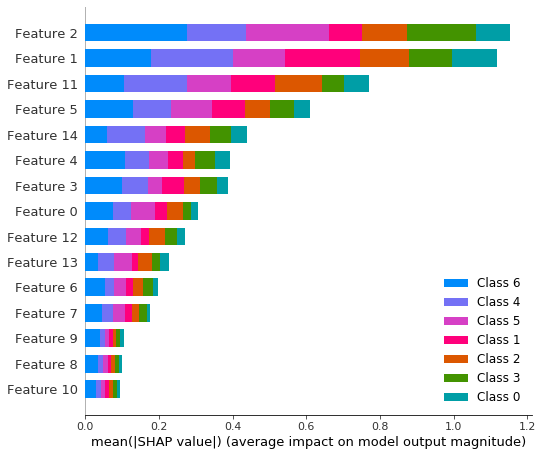

In [72]:
e=shap.DeepExplainer(model_v,X_test)
shape_values=e.shap_values(X_test)
shap.summary_plot(shape_values,X_test)

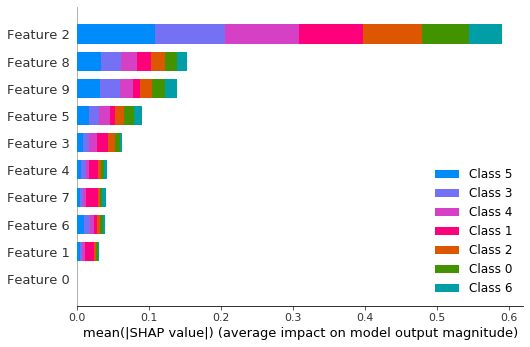

In [169]:
model_v.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_43 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_44 (Dense)             (None, 7)                 119       
Total params: 999
Trainable params: 999
Non-trainable params: 0
_________________________________________________________________


In [68]:
history_dict=history_v.history

loss_v=history_dict['loss']
val_loss_v=history_dict['val_loss']

epochs=range(1,len(loss_v)+1)

acc_v=history_dict['accuracy']
val_acc_v=history_dict['val_accuracy']

auc_v=history_dict['auc']
val_auc_v=history_dict['val_auc']

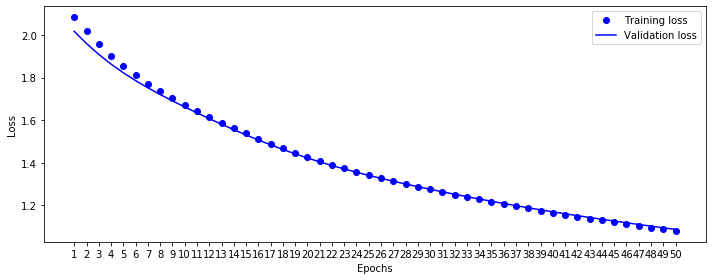

In [69]:
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_v,'bo',label='Training loss')
plt.plot(epochs,val_loss_v,'b',label='Validation loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/loss_vowel_'+save_specifier+'.svg',format='svg', dpi=600)

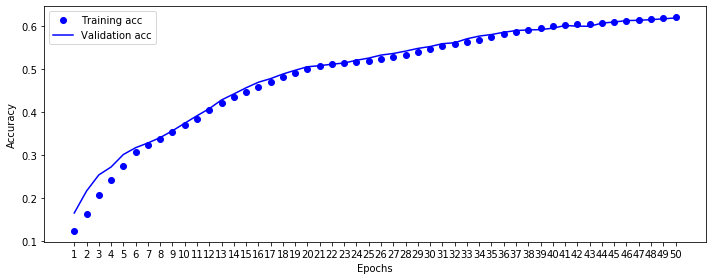

In [70]:
plt.figure(figsize=(10,4))
plt.plot(epochs,acc_v,'bo',label='Training acc')
plt.plot(epochs,val_acc_v,'b',label='Validation acc')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/accuracy_vowel_'+save_specifier+'.svg',format='svg', dpi=600)

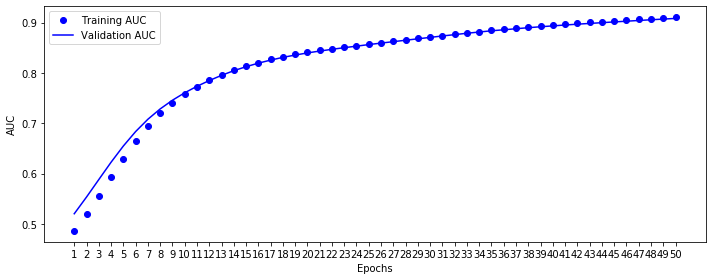

In [71]:
plt.figure(figsize=(10,4))
plt.plot(epochs,auc_v,'bo',label='Training AUC')
plt.plot(epochs,val_auc_v,'b',label='Validation AUC')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/AUC_vowel_'+save_specifier+'.svg',format='svg', dpi=600)

In [73]:
DATA_PATH="./Word_Data/Formant/"

In [74]:
def get_formant(file_path):
    formant=pd.read_csv(file_path,
                delim_whitespace=True,
                header=None,
                names=["time","F1","F2","F3","F4","F5"],
                dtype=np.float64,
                na_values="--undefined--")
    return formant

def get_all_formants(path=DATA_PATH):
    labels=labels=sorted(os.listdir(path))
    all_formant=pd.DataFrame() #empty dataframe to store all_formants
    
    for label_index,label in enumerate(labels):
        folder_formant=pd.DataFrame() #empty dataframe to store formants of indivuals vowels/words i.e. folders

        formant_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(formant_files,"Reading Formants of label -'{}'".format(label)):
            #print(file)
            individual_formant=get_formant(file_path=file)
            
            #for i in range(2,len(individual_formant)):
             #   F_i=individual_formant.loc[i,'F1':'F5'].values
              #  F_i1=individual_formant.loc[i-1,'F1':'F5'].values
              #  F_i2=individual_formant.loc[i-2,'F1':'F5'].values
               # individual_formant.loc[i,['F1_diff2','F2_diff2','F3_diff2','F4_diff2','F5_diff2']]=F_i-2*F_i1+F_i2
            
            length=len(individual_formant)
            F_i=individual_formant.loc[2:,'F1':'F5'].values
            F_i1=individual_formant.loc[1:length-2,'F1':'F5'].values
            F_i2=individual_formant.loc[:length-3,'F1':'F5'].values
            assert len(F_i)==len(F_i1)==len(F_i2)
            individual_formant.loc[2:,['F1_diff2','F2_diff2','F3_diff2','F4_diff2','F5_diff2']]=F_i-2*F_i1+F_i2
            
            individual_formant=individual_formant.dropna()   #drop the first two rows as there are NaN values due to the difference
            
            folder_formant=folder_formant.append(individual_formant,ignore_index=True)
        
        folder_formant['disp(F5-F1)']=folder_formant['F5']-folder_formant['F1']
        folder_formant['disp(F4-F3)']=folder_formant['F4']-folder_formant['F3']
        folder_formant['disp(F5-F3)']=folder_formant['F5']-folder_formant['F3']
        folder_formant['disp(F5-F4)']=folder_formant['F5']-folder_formant['F4']
        
        folder_formant['label']=label_index  #new columns for encoding label
        
        all_formant=all_formant.append(folder_formant,ignore_index=True)
        
        
    return all_formant

def get_train_test(split_ratio=0.8,random_state=42):
    all_formants=get_all_formants()
    
    y=all_formants['label'].values
    
    #all_formants['disp(F5-F1)']=all_formants['F5']-all_formants['F1']
    #all_formants['disp(F4-F3)']=all_formants['F4']-all_formants['F3']
    #all_formants['disp(F5-F3)']=all_formants['F5']-all_formants['F3']
    #all_formants['disp(F5-F4)']=all_formants['F5']-all_formants['F4']
    
    only_formants=all_formants.drop(labels=['label'],axis=1)
    
    normalized_formants=(only_formants-only_formants.mean())/only_formants.std()
    
    X=normalized_formants.values
    

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [75]:
np.random.seed(seed)
X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

Reading Formants of label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 103.61it/s]


In [76]:
model_w=Sequential()
#model_w.add(Dense(128, activation='tanh', input_shape=(6,)))
#model_w.add(Dense(64, activation='tanh'))
model_w.add(Dense(32, activation='tanh',input_shape=(X_train.shape[1],)))
model_w.add(Dense(16, activation='tanh'))
model_w.add(Dense(7, activation='softmax'))

In [77]:
model_w.compile(
    #optimizer=opt.SGD(learning_rate=0.005,momentum=0.9),
    optimizer=opt.Adam(learning_rate=0.005),
    #loss=losses.CategoricalCrossentropy(),
    loss='categorical_crossentropy',
    #metrics=['AUC'],
    #metrics=['accuracy']#,
    metrics=[['accuracy','AUC']]
)

In [78]:
history_w=model_w.fit(X_train, y_train_hot, epochs=50, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

Epoch 1/50
1/1 [==============================] - 0s 382ms/step - loss: 2.0808 - accuracy: 0.1357 - auc: 0.4989 - val_loss: 2.0295 - val_accuracy: 0.1519 - val_auc: 0.5135
Epoch 2/50
1/1 [==============================] - 0s 104ms/step - loss: 2.0221 - accuracy: 0.1514 - auc: 0.5215 - val_loss: 1.9772 - val_accuracy: 0.1814 - val_auc: 0.5420
Epoch 3/50
1/1 [==============================] - 0s 108ms/step - loss: 1.9714 - accuracy: 0.1833 - auc: 0.5488 - val_loss: 1.9332 - val_accuracy: 0.2216 - val_auc: 0.5719
Epoch 4/50
1/1 [==============================] - 0s 126ms/step - loss: 1.9292 - accuracy: 0.2190 - auc: 0.5774 - val_loss: 1.8974 - val_accuracy: 0.2533 - val_auc: 0.5983
Epoch 5/50
1/1 [==============================] - 0s 103ms/step - loss: 1.8951 - accuracy: 0.2446 - auc: 0.6026 - val_loss: 1.8687 - val_accuracy: 0.2710 - val_auc: 0.6198
Epoch 6/50
1/1 [==============================] - 0s 116ms/step - loss: 1.8682 - accuracy: 0.2582 - auc: 0.6230 - val_loss: 1.8458 - val_acc

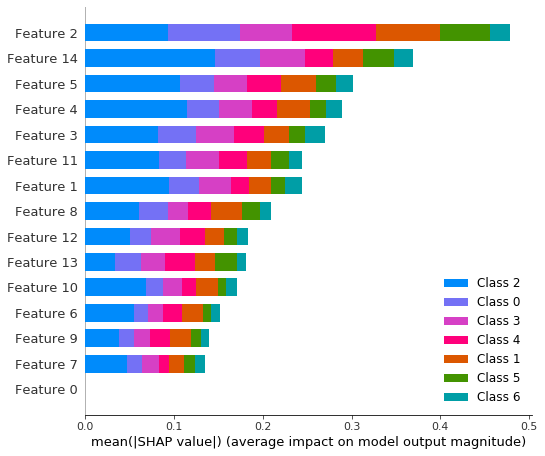

In [86]:
e=shap.DeepExplainer(model_w,X_test)
shape_values=e.shap_values(X_test)
shap.summary_plot(shape_values,X_test)

In [79]:
history_dict=history_w.history
loss_w=history_dict['loss']
val_loss_w=history_dict['val_loss']

epochs=range(1,len(loss_v)+1)

acc_w=history_dict['accuracy']
val_acc_w=history_dict['val_accuracy']

auc_w=history_dict['auc']
val_auc_w=history_dict['val_auc']

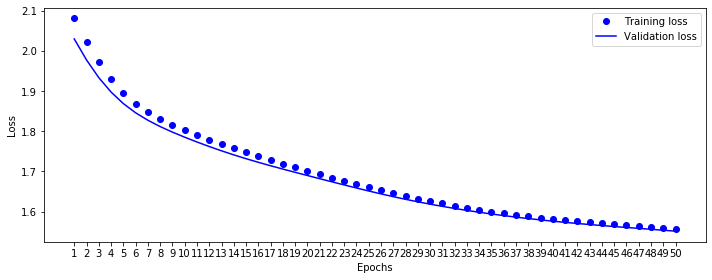

In [80]:
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_w,'bo',label='Training loss')
plt.plot(epochs,val_loss_w,'b',label='Validation loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/loss_word_'+save_specifier+'.svg',format='svg', dpi=600)

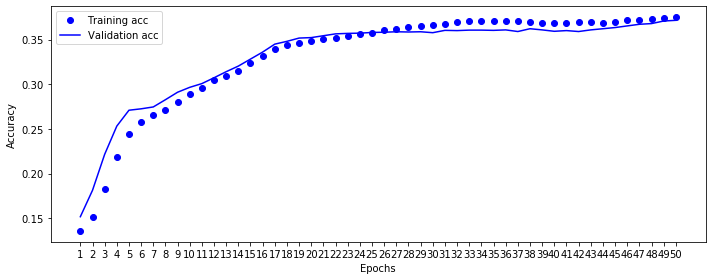

In [81]:
plt.figure(figsize=(10,4))
plt.plot(epochs,acc_w,'bo',label='Training acc')
plt.plot(epochs,val_acc_w,'b',label='Validation acc')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/accuracy_word_'+save_specifier+'.svg',format='svg', dpi=600)

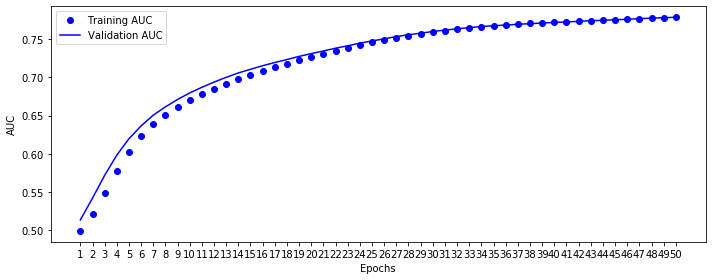

In [82]:
plt.figure(figsize=(10,4))
plt.plot(epochs,auc_w,'bo',label='Training AUC')
plt.plot(epochs,val_auc_w,'b',label='Validation AUC')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/AUC_word_'+save_specifier+'.svg',format='svg', dpi=600)

In [83]:
#COMPARE

In [84]:
epochs=range(1,len(loss_v)+1)

In [85]:
save_specifier='fromant_diff_disp_32_16_tanh_softmax_adam_0.005_batchfull_scaled'

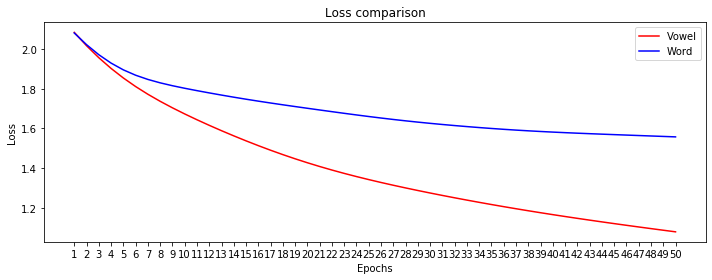

In [86]:
#sns.reset()
#sns.reset_orig()
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_v,'r',label='Vowel')
plt.plot(epochs,loss_w,'b',label='Word')
plt.title('Loss comparison')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/loss_compare_'+save_specifier+'.pdf',format='pdf',dpi=600)

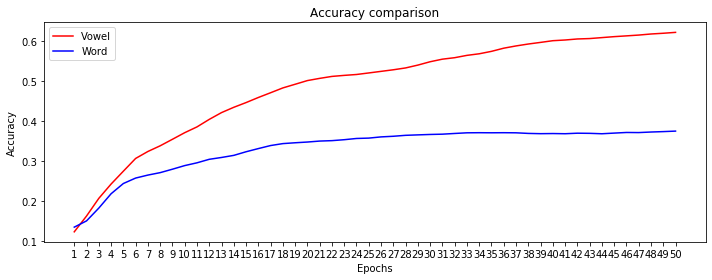

In [87]:
plt.figure(figsize=(10,4))
plt.plot(epochs,acc_v,'r',label='Vowel')
plt.plot(epochs,acc_w,'b',label='Word')
plt.title('Accuracy comparison')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/accuracy_compare_'+save_specifier+'.pdf',format='pdf',dpi=600)

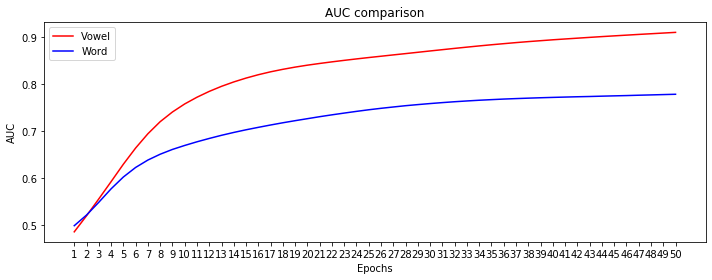

In [88]:
plt.figure(figsize=(10,4))
plt.plot(epochs,auc_v,'r',label='Vowel')
plt.plot(epochs,auc_w,'b',label='Word')
plt.title('AUC comparison')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/AUC_compare_'+save_specifier+'.pdf',format='pdf',dpi=600)

In [89]:
all_compare_df=pd.DataFrame({'loss_v':loss_v,
                      'val_loss_v':val_loss_v,
                      'acc_v':acc_v,
                      'val_acc_v':val_acc_v,
                      'auc_v':auc_v,
                      'val_auc_v':val_auc_v,
                      'loss_w':loss_w,
                      'val_loss_w':val_loss_w,
                      'acc_w':acc_w,
                      'val_acc_w':val_acc_w,
                      'auc_w':auc_w,
                      'val_auc_w':val_auc_w
                     })

all_compare_df.to_csv('./Result/New_without_CNN/all_compare_data_'+save_specifier+'.csv')

In [144]:
all_compare_df.tail()

,loss_v,val_loss_v,acc_v,val_acc_v,auc_v,val_auc_v,loss_w,val_loss_w,acc_w,val_acc_w,auc_w,val_auc_w
45,1.510234,1.498732,0.366437,0.370279,0.796772,0.800146,1.708708,1.714930,0.303956,0.299898,0.720853,0.715563
46,1.504479,1.498546,0.365201,0.367102,0.797813,0.798793,1.707437,1.713586,0.305353,0.300660,0.721409,0.716229
47,1.500465,1.493217,0.364848,0.376633,0.798146,0.801928,1.706840,1.713536,0.305924,0.298121,0.721904,0.715366
48,1.497878,1.487364,0.368114,0.381221,0.799064,0.803229,1.704514,1.714414,0.304591,0.297613,0.721866,0.713816
49,1.493867,1.477454,0.372881,0.384045,0.799755,0.805838,1.703115,1.715560,0.304019,0.295328,0.721080,0.712323


In [40]:
all_compare_df.tail()

,loss_v,val_loss_v,acc_v,val_acc_v,auc_v,val_auc_v,loss_w,val_loss_w,acc_w,val_acc_w,auc_w,val_auc_w
45,1.411883,1.405710,0.447034,0.461701,0.833349,0.836040,1.781247,1.795952,0.276208,0.262062,0.681543,0.670234
46,1.397944,1.405708,0.465660,0.461701,0.838839,0.836425,1.781183,1.794109,0.273224,0.264093,0.679729,0.671856
47,1.398288,1.398337,0.465749,0.469820,0.838970,0.838291,1.782951,1.789811,0.272017,0.279584,0.678212,0.675529
48,1.396289,1.386209,0.470251,0.492411,0.839035,0.842212,1.780074,1.782680,0.288463,0.283647,0.680309,0.680218
49,1.383023,1.377770,0.486405,0.498412,0.843179,0.843809,1.774793,1.775333,0.290939,0.297359,0.684268,0.684437


In [78]:
all_compare_df.tail()

,loss_v,val_loss_v,acc_v,val_acc_v,auc_v,val_auc_v,loss_w,val_loss_w,acc_w,val_acc_w,auc_w,val_auc_w
45,1.645361,1.635071,0.321140,0.318265,0.761262,0.764530,1.794142,1.795046,0.296517,0.292995,0.686432,0.684662
46,1.628057,1.626682,0.320772,0.325983,0.768138,0.769586,1.791320,1.788053,0.302791,0.312337,0.687685,0.687996
47,1.615787,1.615028,0.326379,0.358692,0.774701,0.773985,1.786905,1.775738,0.318541,0.320178,0.689430,0.694610
48,1.608039,1.607040,0.355607,0.356487,0.777154,0.774983,1.776664,1.769562,0.327103,0.317825,0.694150,0.696794
49,1.598885,1.596370,0.358548,0.360529,0.778704,0.778123,1.770723,1.765198,0.325404,0.308677,0.695664,0.698677


In [90]:
all_compare_df.tail()

,loss_v,val_loss_v,acc_v,val_acc_v,auc_v,val_auc_v,loss_w,val_loss_w,acc_w,val_acc_w,auc_w,val_auc_w
45,1.112686,1.118910,0.612776,0.613377,0.904947,0.902697,1.566870,1.560570,0.371871,0.365395,0.776166,0.776080
46,1.104304,1.110964,0.614798,0.614112,0.906490,0.904161,1.564591,1.558269,0.371610,0.367224,0.776922,0.776914
47,1.096042,1.103127,0.617463,0.615583,0.907929,0.905562,1.562321,1.555987,0.372982,0.368008,0.777572,0.777548
48,1.087889,1.095378,0.619301,0.617420,0.909399,0.906913,1.560057,1.553699,0.374028,0.370883,0.778273,0.778163
49,1.079837,1.087704,0.621507,0.619625,0.910848,0.908233,1.557797,1.551383,0.375270,0.371668,0.778951,0.778717
